In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

/home/tbsexton/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Parsing JSON objects...
Done!
Parsed 9295 Tweets.
Dropped 704 Tweets with missing information.
Total tweets in storage: 9295


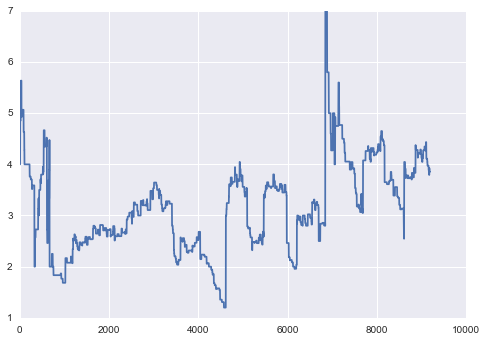

In [7]:
from preprocess import Preprocess
from analysis import *

pre = Preprocess('../tweet_input/tweets.txt')
pre.extract()
df = pre.get_dataframe()

graph_list = rolled_graph_list(df, window=10.)
degrees = g_stats(graph_list, savename='../tweet_output/output.txt')
plt.plot(degrees)

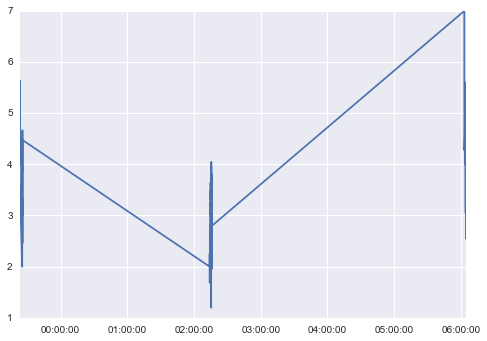

In [22]:
get_times = lambda g: g.graph['time'] 

times = g_stats(graph_list, stat_func=get_times)
plt.plot(times,degrees)

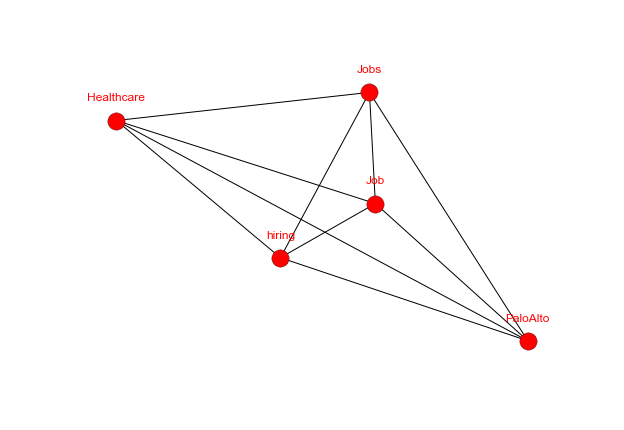

In [5]:
draw_lifted(graph_list[0])

[7, 7, 7, 7, 7, 7, 7, 7]


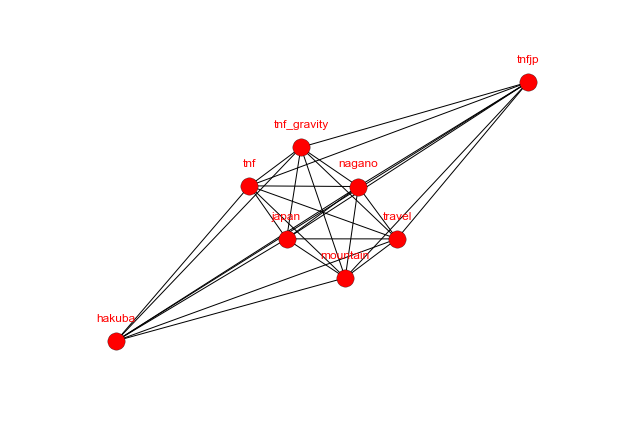

In [21]:
g = graph_list[np.argmax([degrees])]
print g.degree().values()

draw_lifted(g)

[1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


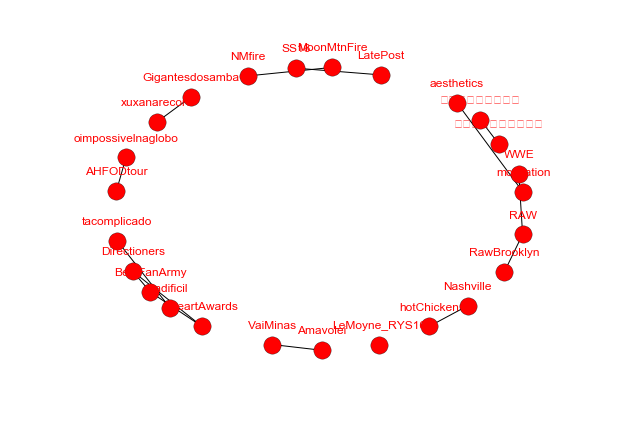

In [19]:
g = graph_list[np.argmin([degrees])]
print g.degree().values()

draw_lifted(g)

In [122]:
df = pd.DataFrame(data = {"time":pd.to_datetime(pre.times), "hashtags":pre.tags})

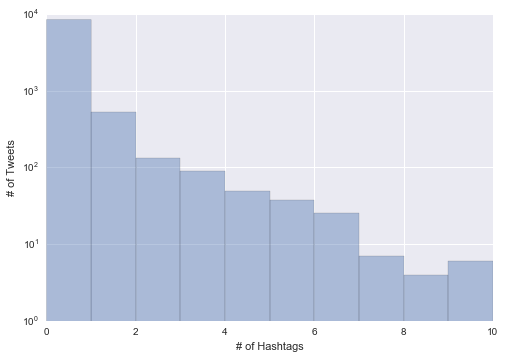

In [13]:
sns.distplot([len(i) for i in df.hashtags], kde=False, bins=range(11), axlabel='# of Hashtags')
plt.yscale('log')
plt.ylabel('# of Tweets')


In [17]:
from pandas.tseries.offsets import *
# sec60 = DateOffset(seconds=60)
start = df.time.min()
# df['deltaT'] = df.time - start
num_tags = [len(i) for i in df.hashtags]
df[df.time<df.time[0]+Minute()]
# df.time[0]>df.time[0]+Minute()

,hashtags,time
0,[],2016-03-28 23:23:12
1,[],2016-03-28 23:23:12
2,[],2016-03-28 23:23:12
3,[],2016-03-28 23:23:11
4,"[hiring, PaloAlto, Healthcare, Job, Jobs]",2016-03-28 23:23:12
5,[],2016-03-28 23:23:12
6,[],2016-03-28 23:23:12
7,[],2016-03-28 23:23:12
8,[],2016-03-28 23:23:12
9,[],2016-03-28 23:23:12


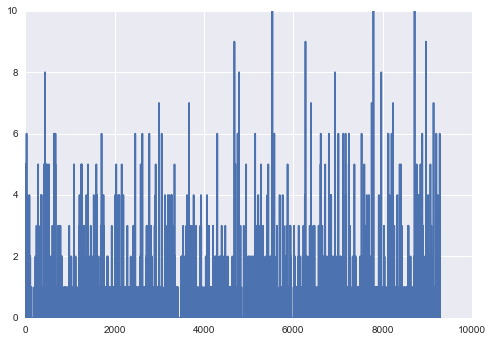

In [18]:
plt.plot(num_tags)

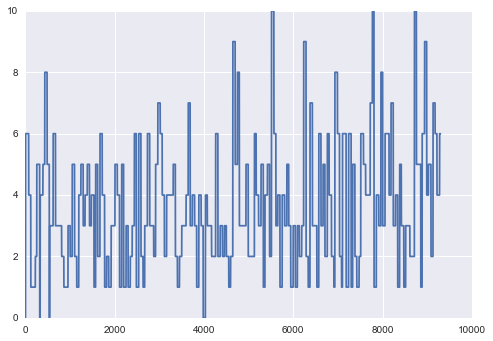

In [22]:
current_tags = []
sorts = df.sort_values('time')
sorts.index=sorts.time
for i in sorts.time:
#     print i, i+Minute()
    temp = sorts[i-.5*Minute():i]
    tot=max([len(i) for i in temp.hashtags])
    current_tags+=[tot]
plt.plot(current_tags)

In [111]:
import networkx as nx
from itertools import combinations
from tqdm import tqdm


def graph_from_tweet(df, tw_no):
    G = nx.Graph(time=df.time[tw_no])
    nodes = df.hashtags[tw_no]
    edges = combinations(nodes, 2)
    G.add_nodes_from(nodes, time = df.time[tw_no])
    G.add_edges_from(edges)
    return G

def graph_from_set(df):
    G = nx.Graph(time = df.time.max())
    
    for i in df.itertuples():
        tw_no, tags, time = i
        
        if len(tags)<2:
            continue
        H = graph_from_tweet(df, tw_no)
        G = nx.compose(G,H)
    return G

F = graph_from_tweet(df, 25)
G = graph_from_tweet(df, 4)
H = graph_from_tweet(df, 11)
graphs = [F,G,H]
I = nx.compose(*graphs)
G.nodes(), H.nodes(), I.nodes()

([u'hiring', u'PaloAlto', u'Jobs', u'Job', u'Healthcare'],
 [u'hiring', u'Job', u'Jobs', u'Honolulu', u'BusinessMgmt'],
 [u'Jobs',
  u'Brentwood',
  u'Hiring',
  u'PaloAlto',
  u'hiring',
  u'Job',
  u'CareerArc',
  u'Healthcare',
  u'Hospitality'])

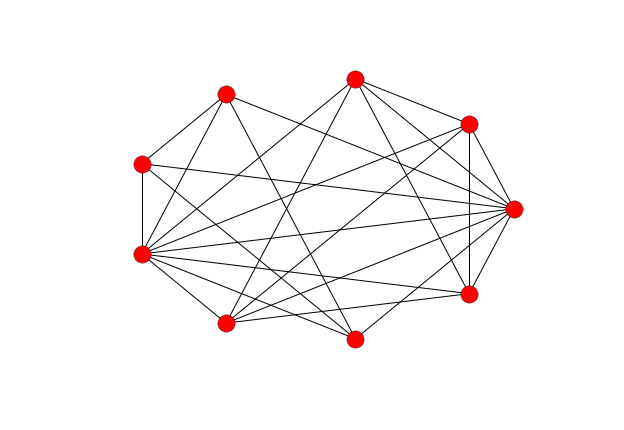

In [49]:
nx.draw(I, pos = nx.circular_layout(I))

In [119]:
%timeit graph_from_set(df.ix[:4000])

10 loops, best of 3: 115 ms per loop


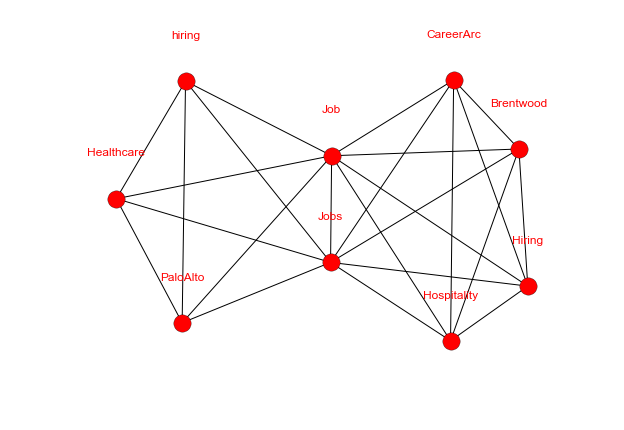

[8, 5, 4, 4, 5, 8, 5, 4, 5]


In [59]:
def draw_lifted(G, pos=None, offset=0.07, fontsize=16):
    """Draw with lifted labels
    http://networkx.lanl.gov/examples/advanced/heavy_metal_umlaut.html
    """
    pos = nx.spring_layout(G) if pos is None else pos
    nx.draw(G, pos, font_size=fontsize, with_labels=False)
    for p in pos:  # raise text positions
        pos[p][1] += offset
    nx.draw_networkx_labels(G, pos, font_color='r')
    plt.show()
draw_lifted(I)
print I.degree().values()

In [ ]:
all_graphs = [graph_from_tweet(df,i) for i in df.index]

In [65]:
%timeit massive_graph = nx.compose_all(all_graphs)

1 loop, best of 3: 15 s per loop


In [64]:
np.mean(massive_graph.degree().values())

2.4736842105263159

In [167]:
%%timeit 

current_tweets = []
roll_graphs = []
current_time = df.time.min()
iter_obj = tqdm(df.itertuples())
for i in iter_obj:
    tw_no, tags, time = i
    if time > current_time:
        current_time = pd.to_datetime(time)
    incl = df[np.logical_and(df.time>=current_time-Minute(), 
                                 df.time<=current_time)]

#     G = graph_from_set(incl)
#     G.graph['time'] = current_time
#     if nx.number_of_nodes(G)>1:
#         roll_graphs+=[G]



1 loop, best of 3: 5.94 s per loop


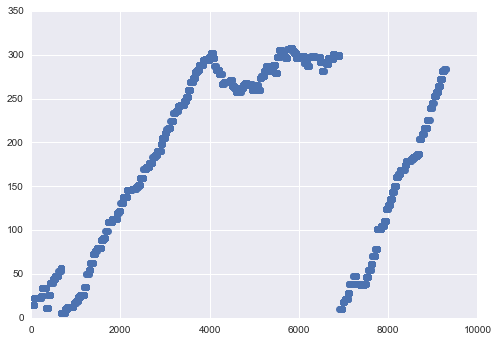

In [154]:
plt.plot( [nx.number_of_nodes(i) for i in roll_graphs], 'o')

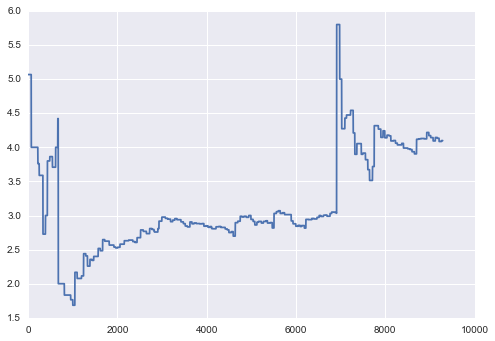

In [159]:
mean_degs = [np.mean(i.degree().values()) for i in roll_graphs]
times = [i.graph['time'] for i in roll_graphs]
plt.plot(mean_degs)

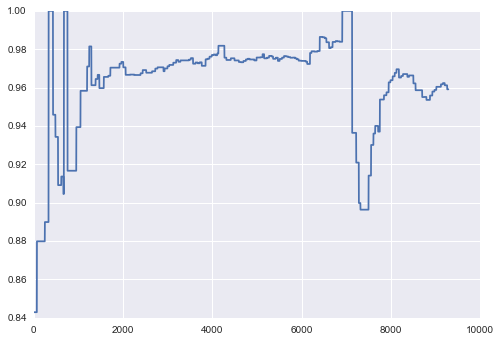

In [160]:
clust = [nx.average_clustering(i, count_zeros=False) for i in roll_graphs]
plt.plot(clust)

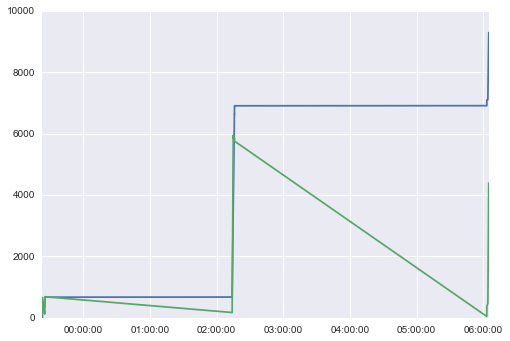

In [95]:
plt.plot(df.time, df.index, 'o')
# plt.plot(df.time, df.incl_tweets)

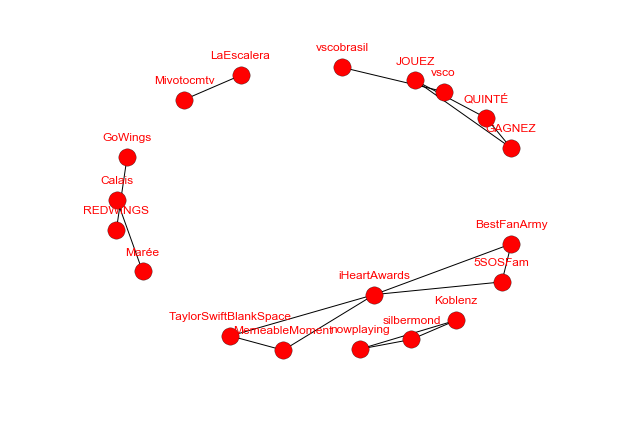

In [162]:
draw_lifted(roll_graphs[np.argmin([mean_degs])])

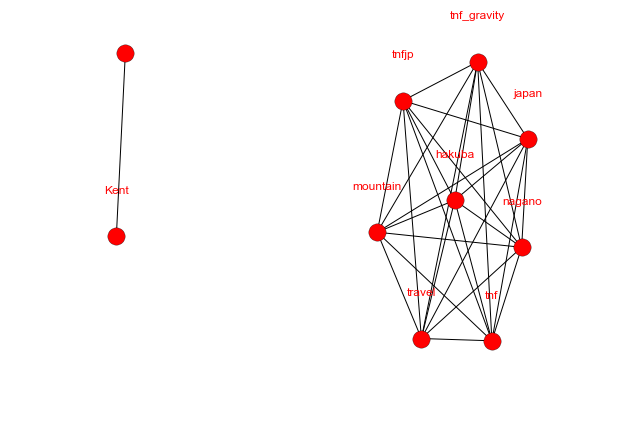

In [174]:
draw_lifted(roll_graphs[np.argmax([mean_degs])])

In [164]:
nx.node_link_data(roll_graphs[np.argmax([mean_degs])])

AttributeError: 'module' object has no attribute 'node_link_data'

In [165]:
import pickle
pickle.dump(roll_graphs, open('../tweet_output/graph_list.txt', 'w'))

In [168]:
np.savetxt('../tweet_output/output.txt', mean_degs, fmt='%.2f')

In [181]:
G = roll_graphs[np.argmax([mean_degs])]
print G.graph, G.nodes()
e = G.nodes()
G.remove_nodes_from(e)
print G.graph, G.nodes()

{'name': 'compose( ,  )', 'time': Timestamp('2016-03-29 06:03:08')} [u'mountain', u'tnf_gravity', u'travel', u'tnf', u'nagano', u'hakuba', u'Weather', u'Kent', u'japan', u'tnfjp']
{'name': 'compose( ,  )', 'time': Timestamp('2016-03-29 06:03:08')} []
